# Have players in the NFL on average changed in weight from 1999 to 2015?

Variables that will be used:

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="te-align: left"> year </div> | <div style="text-align: left"> The Year an NFL player played </div> |
| <div style="text-align: left"> weight </div> | <div style="text-align: left"> NFL player average weight that given a year </div> |

## Step 1a: Data Preparation

Upload the data set form a CSV file and extract a newdatafrome containing the cariables being used. 

In [24]:
# Import all needed libraries
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Read in .csv file nfl_weight_2015_1999.csv
nfl_data_df = pd.read_csv('nfl_weight_2015_1999.csv')
print('head of full database.')
print(nfl_data_df.head(), '\n') 

# Create new dataframe containing only the year and weight columns
weight_data_df = nfl_data_df[['year', 'weight']]
print('head of the two columns used.')
print(weight_data_df.head())

head of full database.
   year            name firstname   lastname position  weight
0  2015  Ameer Abdullah     Ameer   Abdullah       RB     205
1  2015  Nelson Agholor    Nelson    Agholor       WR     198
2  2015       Jay Ajayi       Jay      Ajayi       RB     221
3  2015  Kwon Alexander      Kwon  Alexander      OLB     227
4  2015    Mario Alford     Mario     Alford       WR     180 

head of the two columns used.
   year  weight
0  2015     205
1  2015     198
2  2015     221
3  2015     227
4  2015     180


## Step 1b: Data Preparation

Isolate the 2015 and 1999 roster of weights.

In [25]:
# Create a dataframe for the 2015 roster named weight_2015_df
weight_2015_df = weight_data_df[weight_data_df['year'] == 2015]
weight_2015_df.head()

,year,weight
0,2015,205
1,2015,198
2,2015,221
3,2015,227
4,2015,180


In [26]:
# Create a dataframe for the 1999 roster named weight_1999_df
weight_1999_df = weight_data_df[weight_data_df['year'] == 1999]
weight_1999_df.head()

,year,weight
320,1999,244
321,1999,324
322,1999,318
323,1999,234
324,1999,195


##### Explore the data

In [27]:
# Summary statistics for 2015
print('Summary statistics for 2015')
print(weight_2015_df['weight'].describe(), '\n')

# Summary statistics for 1999
print('Summary statistics for 1999')
print(weight_1999_df['weight'].describe())

Summary statistics for 2015
count    320.000000
mean     244.584375
std       46.103731
min      156.000000
25%      207.000000
50%      234.000000
75%      283.250000
max      355.000000
Name: weight, dtype: float64 

Summary statistics for 1999
count    377.000000
mean     247.625995
std       47.543437
min      164.000000
25%      207.000000
50%      241.000000
75%      290.000000
max      386.000000
Name: weight, dtype: float64


## Step 2: Collect the Random Sample Data

In [28]:
# Create a dataframe for the 2015 roster named sample_weight_2015_df
sample_weight_2015_df = weight_2015_df.sample(n=50, random_state=4)
sample_weight_2015_df.head()

,year,weight
271,2015,218
47,2015,271
301,2015,186
218,2015,197
284,2015,221


In [29]:
# Create a dataframe for the 1999 roster named sample_weight_1999_df
sample_weight_1999_df = weight_1999_df.sample(n=50, random_state=4)
sample_weight_1999_df.head()

,year,weight
585,1999,233
637,1999,210
388,1999,186
334,1999,294
525,1999,210


In [30]:
# Summary statistics for 2015 sample of 50
print('Summary statistics for 2015 sample of 50')
print(sample_weight_2015_df['weight'].describe(), '\n')

# Summary statistics for 1999 sample of 50
print('Summary statistics for 1999 sample of 50')
print(sample_weight_1999_df[['weight']].describe())

Summary statistics for 2015 sample of 50
count     50.000000
mean     240.340000
std       42.473814
min      182.000000
25%      200.000000
50%      232.500000
75%      279.250000
max      321.000000
Name: weight, dtype: float64 

Summary statistics for 1999 sample of 50
           weight
count   50.000000
mean   238.680000
std     45.292897
min    178.000000
25%    202.250000
50%    224.000000
75%    283.000000
max    336.000000


## Step 3: Data Visualization

### Compare the 2015 and 1999 weight distributions with a histogram

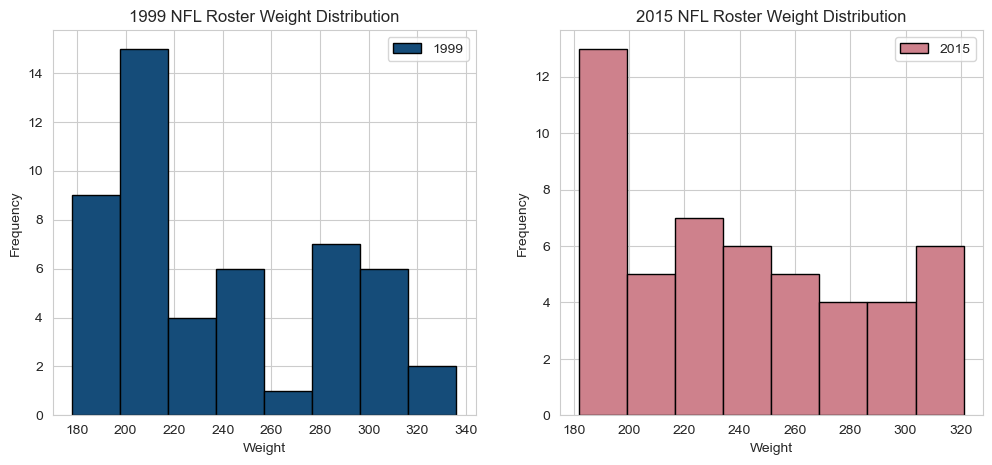

In [31]:
# Create histograms for the 2015 and 1999 NFL weights
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(sample_weight_1999_df['weight'], bins=8, label='1999', edgecolor='black', color='#154c79')
ax[0].legend(loc='upper right')
ax[0].set_title('1999 NFL Roster Weight Distribution')
ax[0].set_xlabel('Weight')
ax[0].set_ylabel('Frequency')
ax[1].hist(sample_weight_2015_df['weight'], bins=8, label='2015', edgecolor='black', color = '#Ce818c')
ax[1].legend(loc='upper right')
ax[1].set_title('2015 NFL Roster Weight Distribution')
ax[1].set_xlabel('Weight')
ax[1].set_ylabel('Frequency')

plt.show() 

In [32]:
# Calculate the skewness of the 2015 and 1999 NFL weights
print('Skewness of 2015 NFL weights')
print(sample_weight_2015_df['weight'].skew(), '\n')

print('Skewness of 1999 NFL weights')
print(sample_weight_1999_df['weight'].skew())


Skewness of 2015 NFL weights
0.5073454042670441 

Skewness of 1999 NFL weights
0.5785085119469463


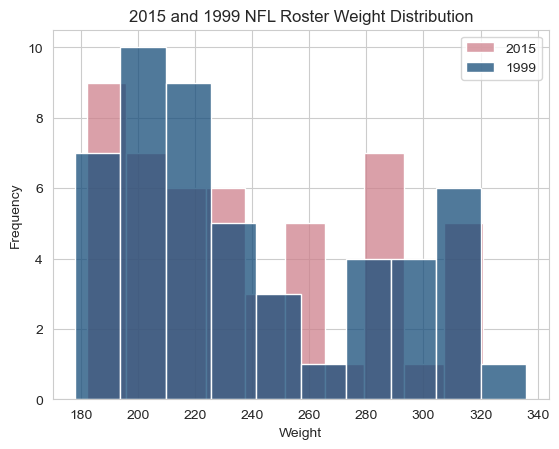

In [33]:
# Create a histogram to compare the 2015 and 1999 weight distributions
sns.histplot(sample_weight_2015_df['weight'], bins=10, label='2015', color = '#Ce818c')
sns.histplot(sample_weight_1999_df['weight'], bins=10, label='1999', color='#154c79')
plt.legend(loc='upper right')
plt.title('2015 and 1999 NFL Roster Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

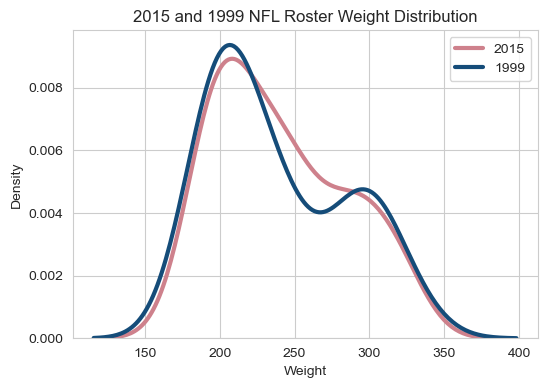

In [34]:
# Create KDE plots to compare the 2015 and 1999 weight distributions
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))
sns.kdeplot(sample_weight_2015_df['weight'], label='2015', color = '#Ce818c', linewidth=3)
sns.kdeplot(sample_weight_1999_df['weight'], label='1999', color='#154c79', linewidth=3)
plt.legend(loc='upper right')
plt.title('2015 and 1999 NFL Roster Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

### Compare the 1999 and 2015 weight distributions with side-by-side boxplots

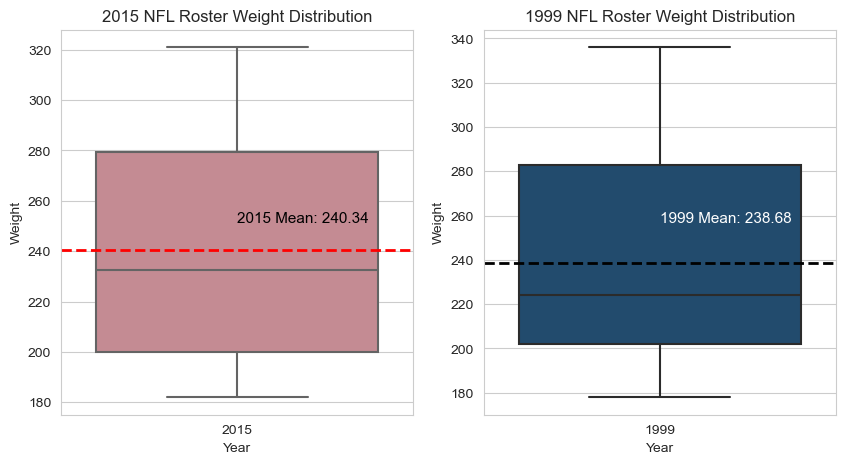

In [35]:
# Create a side by side boxplots using subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x='year', y='weight', data=sample_weight_2015_df, ax=ax[0], color = '#Ce818c')
sns.boxplot(x='year', y='weight', data=sample_weight_1999_df, ax=ax[1], color='#154c79')

# Add the mean values to the boxplot
year_2015_mean = sample_weight_2015_df['weight'].mean()
year_1999_mean = sample_weight_1999_df['weight'].mean()

ax[0].axhline(year_2015_mean, color='red', linestyle='--', linewidth=2)
ax[0].text(0.5, 0.5, '2015 Mean: {:.2f}'.format(year_2015_mean), transform=ax[0].transAxes, fontsize=11, color='black')

ax[1].axhline(year_1999_mean, color='black', linestyle='--', linewidth=2)
ax[1].text(0.5, 0.5, '1999 Mean: {:.2f}'.format(year_1999_mean), transform=ax[1].transAxes, fontsize=11, color='white')

# Add titles, labels and legend
ax[0].set_title('2015 NFL Roster Weight Distribution')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Weight')

ax[1].set_title('1999 NFL Roster Weight Distribution')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Weight')

plt.show()




## Step 4a: Descriptive Statistics: Weights of 2015

In [36]:
# Calculate the summary statistics for the NFL weights in 2015 using the describe() function
print('Summary Statistics for the 2015 weights')
print('---------------------------------------')
print(round(sample_weight_2015_df[['weight']].describe(), 2))

Summary Statistics for the 2015 weights
---------------------------------------
       weight
count   50.00
mean   240.34
std     42.47
min    182.00
25%    200.00
50%    232.50
75%    279.25
max    321.00


## Step 4b: Descriptive Statistics: Weights of 1999

In [37]:
# Calculate the summary statistics for the NFL weights in 1999 using the describe() function
print('Summary Statistics for the 1999 weights')
print('---------------------------------------')
print(round(sample_weight_1999_df[['weight']].describe(), 2))

Summary Statistics for the 1999 weights
---------------------------------------
       weight
count   50.00
mean   238.68
std     45.29
min    178.00
25%    202.25
50%    224.00
75%    283.00
max    336.00


## Step 5a: Confidence Intervals for the weights of 2015 NFL players

In [38]:
# Create a 95% confidence interval for the 2015 NFL weights
print('95% Confidence Interval for the 2015 NFL weights')
print('------------------------------------------------')

# st.t.interval parameters
sample_mean_2015 = np.mean(sample_weight_2015_df['weight'])
print('mean = ', sample_mean_2015)
sample_stdev_2015 = np.std(sample_weight_2015_df['weight'])
print('stdev = ', sample_stdev_2015)
sample_error_2015 = st.sem(sample_weight_2015_df['weight'])
print('stderr = ', sample_error_2015)
df = len(sample_weight_2015_df['weight'])-1
print('df = ', df, '\n')

# 95% Confidence Interval rounded to 2 decimal places
confidence_interval_2015 = st.t.interval(0.95, df=df, loc=sample_mean_2015, scale=sample_error_2015)
print('95% Confidence Interval for the 2015 NFL weights: ', np.round(confidence_interval_2015, 2), '\n')

# 99% Confidence Interval rounded to 2 decimal places
confidence_interval_2015 = st.t.interval(0.99, df=df, loc=sample_mean_2015, scale=sample_error_2015)
print('99% Confidence Interval for the 2015 NFL weights: ', np.round(confidence_interval_2015, 2))

95% Confidence Interval for the 2015 NFL weights
------------------------------------------------
mean =  240.34
stdev =  42.04693092248233
stderr =  6.006704417497474
df =  49 

95% Confidence Interval for the 2015 NFL weights:  [228.27 252.41] 

99% Confidence Interval for the 2015 NFL weights:  [224.24 256.44]


## Step 5b: Confidence Intervals for the weights of 1999 NFL players

In [39]:
# Create a 95% confidence interval for the 1999 NFL weights
print('95% Confidence Interval for the 1999 NFL weights')
print('------------------------------------------------')

# st.t.interval parameters
sample_mean_1999 = np.mean(sample_weight_1999_df['weight'])
print('mean = ', sample_mean_1999)
sample_stdev_1999 = np.std(sample_weight_1999_df['weight'])
print('stdev = ', sample_stdev_1999)
sample_error_1999 = st.sem(sample_weight_1999_df['weight'])
print('stderr = ', sample_error_1999)
df = len(sample_weight_1999_df['weight'])-1
print('df = ', df, '\n')

# 95% Confidence Interval rounded to 2 decimal places
confidence_interval_1999 = st.t.interval(0.95, df=df, loc=sample_mean_1999, scale=sample_error_1999)
print('95% Confidence Interval for the 1999 NFL weights: ', np.round(confidence_interval_1999, 2), '\n')

# 99% Confidence Interval rounded to 2 decimal places
confidence_interval_1999 = st.t.interval(0.99, df=df, loc=sample_mean_1999, scale=sample_error_1999)
print('99% Confidence Interval for the 1999 NFL weights: ', np.round(confidence_interval_1999, 2))


95% Confidence Interval for the 1999 NFL weights
------------------------------------------------
mean =  238.68
stdev =  44.83768058229595
stderr =  6.4053829403279945
df =  49 

95% Confidence Interval for the 1999 NFL weights:  [225.81 251.55] 

99% Confidence Interval for the 1999 NFL weights:  [221.51 255.85]


## Step 5c: Confidence Interval for the difference between the means of the 2015 and 1999 NFL weights

In [40]:
# Create a 95% confidence interval for the difference between the 2015 and 1999 NFL weights

# Calculate the difference between the sample means
mean_diff = sample_mean_2015 - sample_mean_1999

# Calculate the standard error of the difference between the sample means
stdev_diff = np.sqrt((sample_stdev_2015**2/len(sample_weight_2015_df['weight'])) + (sample_stdev_1999**2/len(sample_weight_1999_df['weight'])))

# Calculate the degrees of freedom
df = len(sample_weight_2015_df['weight']) -1

# Calculate the 95% confidence interval
confidence_interval = st.t.interval(0.95, df=df, loc=mean_diff, scale=stdev_diff)
print('95% Confidence Interval for the difference between the 2015 and 1999 NFL weights: ', np.round(confidence_interval, 2), '\n')

# Calculate the 99% confidence interval
confidence_interval = st.t.interval(0.99, df=df, loc=mean_diff, scale=stdev_diff)
print('99% Confidence Interval for the difference between the 2015 and 1999 NFL weights: ', np.round(confidence_interval, 2))


95% Confidence Interval for the difference between the 2015 and 1999 NFL weights:  [-15.81  19.13] 

99% Confidence Interval for the difference between the 2015 and 1999 NFL weights:  [-21.64  24.96]


## Step 6a: Hypothesis Test

| <div style="text-align: left"> Notation </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> &mu;<sub>1</sub> </div> | <div style="text-align: left"> The mean weight of 2015 players </div> |
| <div style="text-align: left"> &mu;<sub>2</sub> </div> | <div style="text-align: left"> The mean weight of 1999 players </div> |

### Claim: The mean weights for NFL players in 2015 are NOT the same as the mean weights of NFL players in 1999.

H<sub>0</sub>: &mu;<sub>1</sub> - &mu;<sub>2</sub>  = 0  
H<sub>1</sub>: &mu;<sub>1</sub> - &mu;<sub>2</sub> &ne; 0


In [41]:
# Conduct a two-sample t-test of the difference between the 2015 and 1999 NFL weights

alpha = 0.05
t_stat, p_value = st.ttest_ind(sample_weight_2015_df['weight'], sample_weight_1999_df['weight'], equal_var=False)

# print the rounded results
print('t-statistic = ', np.round(t_stat, 2))
print('p-value = ', np.round(p_value, 4), '\n')

print('Conclusion:')
if p_value < alpha:
    print('Reject the null hypothesis. There is sufficient evidence to support the claim that the mean weight of NFL players in 2015 is different than the mean weight of NFL players in 1999.')
else:   
    print('Fail to reject the null hypothesis. There is not sufficient evidence to support the claim that the mean weight of NFL players in 2015 is different than the mean weight of NFL players in 1999.')

t-statistic =  0.19
p-value =  0.8505 

Conclusion:
Fail to reject the null hypothesis. There is not sufficient evidence to support the claim that the mean weight of NFL players in 2015 is different than the mean weight of NFL players in 1999.


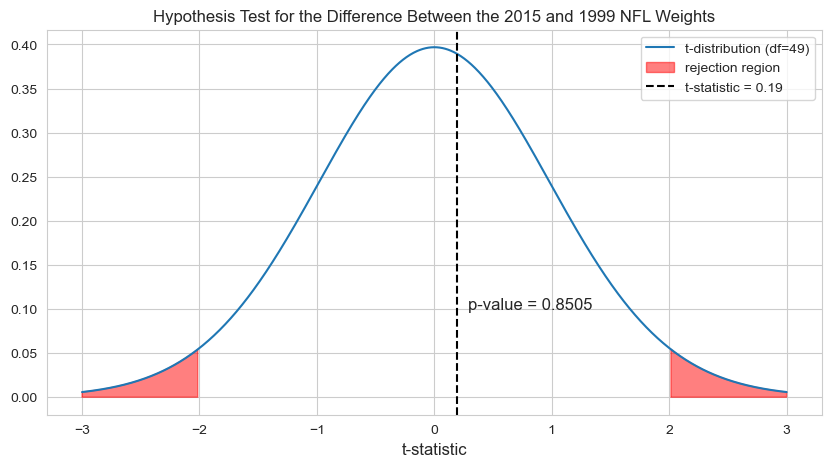

In [42]:
# Create a graph of the hypothesis test
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-3, 3, 1000)
y = st.t.pdf(x, df=df)
plt.plot(x, y, label='t-distribution (df={})'.format(df))

# Calculate the critical values for a two-tailed test
left_critical = st.t.ppf(alpha/2, df=df)
right_critical = -left_critical

# Plot the critical values
plt.fill_between(x, 0, y, where = (x<left_critical) | (x>right_critical), color='red', alpha=0.5, label='rejection region')

# Plot the t-statistic
plt.axvline(x=t_stat, color='black', linestyle='--', label='t-statistic = {:.2f}'.format(t_stat))

# Plot the p-value
plt.text(x=t_stat + 0.1, y=0.1, s='p-value = {}'.format(np.round(p_value, 4)), fontsize=12)

# Add legend and labels
plt.legend(loc='upper right')
plt.title('Hypothesis Test for the Difference Between the 2015 and 1999 NFL Weights')
plt.xlabel('t-statistic', fontsize=12)
plt.show()

## Step 6b: Hypothesis Test

| <div style="text-align: left"> Notation </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> &mu; </div> | <div style="text-align: left"> The mean weight of 2015 players </div> |


### Claim: The mean weights for NFL players in 2015 is greater than 226

H<sub>0</sub>: &mu; = 226  
H<sub>1</sub>: &mu; = 226

In [43]:
# Conduct a right-tailed t-test to determine it the mean weight of NFL players in 2015 is greater than 226 pounds

alpha = 0.01
t_stat, p_value = st.ttest_1samp(sample_weight_2015_df['weight'], 226)

# print the rounded results
print('t-statistic = ', np.round(t_stat, 2))
print('p-value = ', np.round(p_value, 4), '\n')

print('Conclusion:')
if p_value < alpha:
    print('Reject the null hypothesis. There is sufficient evidence to support the claim that the mean weight of NFL players in 2015 is greater than 226 pounds.')
else:
    print('Fail to reject the null hypothesis. There is not sufficient evidence to support the claim that the mean weight of NFL players in 2015 is greater than 226 pounds.')
    

t-statistic =  2.39
p-value =  0.0209 

Conclusion:
Fail to reject the null hypothesis. There is not sufficient evidence to support the claim that the mean weight of NFL players in 2015 is greater than 226 pounds.


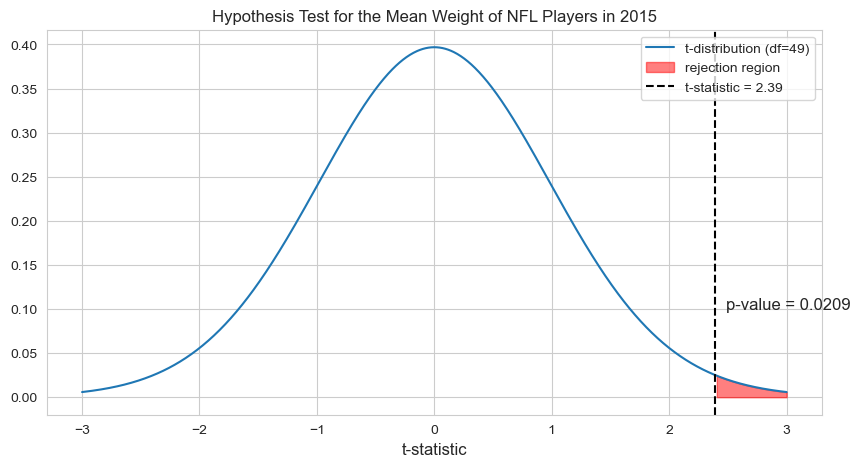

In [44]:
# Create a graph of the hypothesis test
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-3, 3, 1000)
y = st.t.pdf(x, df=df)
plt.plot(x, y, label='t-distribution (df={})'.format(df))

# Calculate the critical value for a right-tailed test
right_critical = st.t.ppf(1-alpha, df=df)


# Plot the critical value
plt.fill_between(x, 0, y, where = x>right_critical, color='red', alpha=0.5, label='rejection region')

# Plot the t-statistic
plt.axvline(x=t_stat, color='black', linestyle='--', label='t-statistic = {:.2f}'.format(t_stat))

# Plot the p-value
plt.text(x=t_stat + 0.1, y=0.1, s='p-value = {}'.format(np.round(p_value, 4)), fontsize=12)

# Add legend and labels
plt.legend(loc='upper right')
plt.title('Hypothesis Test for the Mean Weight of NFL Players in 2015')
plt.xlabel('t-statistic', fontsize=12)
plt.show()

In [45]:
sigma = 46.10
samp_mean_2015 = np.mean(sample_weight_2015_df['weight'])
n = len(sample_weight_2015_df['weight'])

# Conduct a right-tailed z-test to determine it the mean weight of NFL players in 2015 is greater than 226 pounds

alpha = 0.01
z_stat = (samp_mean_2015 - 226)/(sigma/np.sqrt(n))
p_value = st.norm.cdf(z_stat)

# print the rounded results
print('z-statistic = ', np.round(z_stat, 2))
print('p-value = ', np.round(p_value, 4), '\n')

print('Conclusion:')
if p_value < alpha:
    print('Reject the null hypothesis. There is sufficient evidence to support the claim that the mean weight of NFL players in 2015 is greater than 226 pounds.')
else:
    print('Fail to reject the null hypothesis. There is not sufficient evidence to support the claim that the mean weight of NFL players in 2015 is greater than 226 pounds.')

z-statistic =  2.2
p-value =  0.9861 

Conclusion:
Fail to reject the null hypothesis. There is not sufficient evidence to support the claim that the mean weight of NFL players in 2015 is greater than 226 pounds.


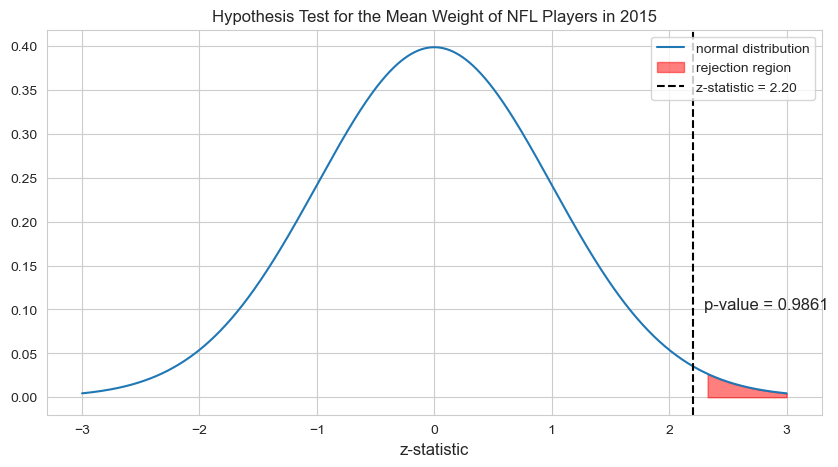

In [46]:
# Create a graph of the hypothesis test
fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-3, 3, 1000)
y = st.norm.pdf(x)
plt.plot(x, y, label='normal distribution')

# Calculate the critical value for a right-tailed test
right_critical = st.norm.ppf(1-alpha)

# Plot the critical value
plt.fill_between(x, 0, y, where = x>right_critical, color='red', alpha=0.5, label='rejection region')

# Plot the z-statistic
plt.axvline(x=z_stat, color='black', linestyle='--', label='z-statistic = {:.2f}'.format(z_stat))

# Plot the p-value
plt.text(x=z_stat + 0.1, y=0.1, s='p-value = {}'.format(np.round(p_value, 4)), fontsize=12)

# Add legend and labels
plt.legend(loc='upper right')
plt.title('Hypothesis Test for the Mean Weight of NFL Players in 2015')
plt.xlabel('z-statistic', fontsize=12)
plt.show()